Breast Cancer Detector
8/11/2019
Daeseob Lim and Andy Kaplan

Dataset: https://www.kaggle.com/merishnasuwal/breast-cancer-prediction-dataset#Breast_cancer_data.csv

Introduction:
We plan to train a neural network model that predicts breast cancer on patients given measurements of their breast features.

In [2]:
import pandas as pd

data = pd.read_csv('Breast_cancer_data.csv')

data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


As the example of the data set above shows, we will be working with breast feature measurements.
We will split the data 50% training, 25% validation, and 25% testing.

In [62]:
import csv
import numpy as np
import math

# Getting Data
with open('Breast_cancer_data.csv', 'r') as f:
    data = list(csv.reader(f, delimiter=';'))

for i in range(len(data)):
    data[i] = data[i][0].split(',')

data.pop(0)
data = np.array(data, np.float64)

n = math.floor(len(data) * .5)
m = math.floor(len(data) * .25)

np.random.shuffle(data)
trainData = data[:n,:5]
trainTarget = data[:n, 5]
valData = data[n:n+m, :5]
valTarget = data[n:n+m, 5]
testData = data[n+m:, :5]
testTarget = data[n+m:, 5]

As a sanity check, let's check the size of each dataset.

In [66]:
print("Training data and target length: ", len(trainData))
print("Validation data and target length: ", len(valData))
print("Testing data and target length: ", len(testData))
print("Total length of data: ", len(data))

Training data and target length:  284
Validation data and target length:  142
Testing data and target length:  143
Total length of data:  569


Data is now split up into train, validation, and test.
Before we move on to constructing the model, some of the data must be normalized to be in the range of [-1, 1]

In [64]:
radius = []
texture = []
perimeter = []
area = []

for i in range(len(trainData)):
    radius.append(trainData[i][0])
    texture.append(trainData[i][1])
    perimeter.append(trainData[i][2])
    area.append(trainData[i][3])

radiusMean = np.mean(radius)
textureMean = np.mean(texture)
perimeterMean = np.mean(perimeter)
areaMean = np.mean(area)
radiusStd = np.std(radius)
textureStd = np.std(texture)
perimeterStd = np.std(perimeter)
areaStd = np.std(area)

trainData[:, 0] -= radiusMean
trainData[:, 0] /= radiusStd
trainData[:, 1] -= textureMean
trainData[:, 1] /= textureStd
trainData[:, 2] -= perimeterMean
trainData[:, 2] /= perimeterStd
trainData[:, 3] -= areaMean
trainData[:, 3] /= areaStd

valData[:, 0] -= radiusMean
valData[:, 0] /= radiusStd
valData[:, 1] -= textureMean
valData[:, 1] /= textureStd
valData[:, 2] -= perimeterMean
valData[:, 2] /= perimeterStd
valData[:, 3] -= areaMean
valData[:, 3] /= areaStd

testData[:, 0] -= radiusMean
testData[:, 0] /= radiusStd
testData[:, 1] -= textureMean
testData[:, 1] /= textureStd
testData[:, 2] -= perimeterMean
testData[:, 2] /= perimeterStd
testData[:, 3] -= areaMean
testData[:, 3] /= areaStd

Once again, we will do a sanity check.

In [65]:
print(trainData[0])

[0.78788353 0.12083495 0.68747722 0.65318985 0.07445   ]


Great! The data is now normalized and the values are in a respectable range from each other.
Now to create a neural network.

In [67]:
import keras
from keras import models
from keras import layers
from keras import optimizers

keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(5,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_hist = model.fit(trainData, trainTarget, epochs=300, batch_size=128, validation_data=(valData, valTarget))

Using TensorFlow backend.
W0811 13:08:35.964575 19556 deprecation_wrapper.py:119] From C:\Users\theda\Anaconda3\envs\hello-tf\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0811 13:08:35.966574 19556 deprecation_wrapper.py:119] From C:\Users\theda\Anaconda3\envs\hello-tf\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0811 13:08:36.088013 19556 deprecation_wrapper.py:119] From C:\Users\theda\Anaconda3\envs\hello-tf\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 13:08:36.092993 19556 deprecation_wrapper.py:119] From C:\Users\theda\Anaconda3\envs\hello-tf\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is depr

Train on 284 samples, validate on 142 samples
Epoch 1/300
284/284 [==============================] - 1s 4ms/step - loss: 0.7374 - acc: 0.2887 - val_loss: 0.6806 - val_acc: 0.4930
Epoch 2/300
284/284 [==============================] - 0s 33us/step - loss: 0.6724 - acc: 0.6232 - val_loss: 0.6167 - val_acc: 0.8592
Epoch 3/300
284/284 [==============================] - 0s 54us/step - loss: 0.6113 - acc: 0.8592 - val_loss: 0.5606 - val_acc: 0.8944
Epoch 4/300
284/284 [==============================] - 0s 63us/step - loss: 0.5589 - acc: 0.8697 - val_loss: 0.5119 - val_acc: 0.9155
Epoch 5/300
284/284 [==============================] - 0s 41us/step - loss: 0.5140 - acc: 0.8732 - val_loss: 0.4700 - val_acc: 0.9085
Epoch 6/300
284/284 [==============================] - 0s 51us/step - loss: 0.4729 - acc: 0.8732 - val_loss: 0.4343 - val_acc: 0.9085
Epoch 7/300
284/284 [==============================] - 0s 33us/step - loss: 0.4381 - acc: 0.8732 - val_loss: 0.4036 - val_acc: 0.9085
Epoch 8/300
284/2

284/284 [==============================] - 0s 39us/step - loss: 0.2286 - acc: 0.8838 - val_loss: 0.2506 - val_acc: 0.9014
Epoch 62/300
284/284 [==============================] - 0s 27us/step - loss: 0.2282 - acc: 0.8838 - val_loss: 0.2505 - val_acc: 0.9014
Epoch 63/300
284/284 [==============================] - 0s 32us/step - loss: 0.2277 - acc: 0.8873 - val_loss: 0.2498 - val_acc: 0.9085
Epoch 64/300
284/284 [==============================] - 0s 33us/step - loss: 0.2273 - acc: 0.8838 - val_loss: 0.2484 - val_acc: 0.9085
Epoch 65/300
284/284 [==============================] - 0s 33us/step - loss: 0.2266 - acc: 0.8838 - val_loss: 0.2467 - val_acc: 0.9085
Epoch 66/300
284/284 [==============================] - 0s 36us/step - loss: 0.2264 - acc: 0.8873 - val_loss: 0.2448 - val_acc: 0.9085
Epoch 67/300
284/284 [==============================] - 0s 35us/step - loss: 0.2257 - acc: 0.8908 - val_loss: 0.2436 - val_acc: 0.9085
Epoch 68/300
284/284 [==============================] - 0s 30us/step

284/284 [==============================] - 0s 30us/step - loss: 0.2034 - acc: 0.8944 - val_loss: 0.2375 - val_acc: 0.9225
Epoch 122/300
284/284 [==============================] - 0s 34us/step - loss: 0.2031 - acc: 0.8944 - val_loss: 0.2362 - val_acc: 0.9225
Epoch 123/300
284/284 [==============================] - 0s 30us/step - loss: 0.2027 - acc: 0.8944 - val_loss: 0.2333 - val_acc: 0.9225
Epoch 124/300
284/284 [==============================] - 0s 38us/step - loss: 0.2021 - acc: 0.9049 - val_loss: 0.2310 - val_acc: 0.9225
Epoch 125/300
284/284 [==============================] - 0s 27us/step - loss: 0.2020 - acc: 0.9014 - val_loss: 0.2306 - val_acc: 0.9225
Epoch 126/300
284/284 [==============================] - 0s 43us/step - loss: 0.2015 - acc: 0.9014 - val_loss: 0.2319 - val_acc: 0.9225
Epoch 127/300
284/284 [==============================] - 0s 32us/step - loss: 0.2009 - acc: 0.9049 - val_loss: 0.2335 - val_acc: 0.9225
Epoch 128/300
284/284 [==============================] - 0s 33

Epoch 181/300
284/284 [==============================] - 0s 35us/step - loss: 0.1753 - acc: 0.9190 - val_loss: 0.2307 - val_acc: 0.9225
Epoch 182/300
284/284 [==============================] - 0s 36us/step - loss: 0.1745 - acc: 0.9190 - val_loss: 0.2283 - val_acc: 0.9225
Epoch 183/300
284/284 [==============================] - 0s 50us/step - loss: 0.1742 - acc: 0.9225 - val_loss: 0.2267 - val_acc: 0.9225
Epoch 184/300
284/284 [==============================] - 0s 43us/step - loss: 0.1738 - acc: 0.9225 - val_loss: 0.2265 - val_acc: 0.9225
Epoch 185/300
284/284 [==============================] - 0s 45us/step - loss: 0.1732 - acc: 0.9225 - val_loss: 0.2274 - val_acc: 0.9155
Epoch 186/300
284/284 [==============================] - 0s 41us/step - loss: 0.1720 - acc: 0.9261 - val_loss: 0.2300 - val_acc: 0.9155
Epoch 187/300
284/284 [==============================] - 0s 49us/step - loss: 0.1719 - acc: 0.9261 - val_loss: 0.2332 - val_acc: 0.9085
Epoch 188/300
284/284 [=========================

Epoch 241/300
284/284 [==============================] - 0s 34us/step - loss: 0.1448 - acc: 0.9261 - val_loss: 0.2296 - val_acc: 0.8873
Epoch 242/300
284/284 [==============================] - 0s 30us/step - loss: 0.1444 - acc: 0.9261 - val_loss: 0.2362 - val_acc: 0.8944
Epoch 243/300
284/284 [==============================] - 0s 35us/step - loss: 0.1442 - acc: 0.9331 - val_loss: 0.2396 - val_acc: 0.9014
Epoch 244/300
284/284 [==============================] - 0s 27us/step - loss: 0.1442 - acc: 0.9366 - val_loss: 0.2428 - val_acc: 0.9014
Epoch 245/300
284/284 [==============================] - 0s 38us/step - loss: 0.1440 - acc: 0.9366 - val_loss: 0.2401 - val_acc: 0.9014
Epoch 246/300
284/284 [==============================] - 0s 29us/step - loss: 0.1424 - acc: 0.9366 - val_loss: 0.2315 - val_acc: 0.8944
Epoch 247/300
284/284 [==============================] - 0s 36us/step - loss: 0.1430 - acc: 0.9331 - val_loss: 0.2289 - val_acc: 0.8944
Epoch 248/300
284/284 [=========================

The network has been trained with 2 hidden layers of 64 nodes. Let's look at the results through a graph.

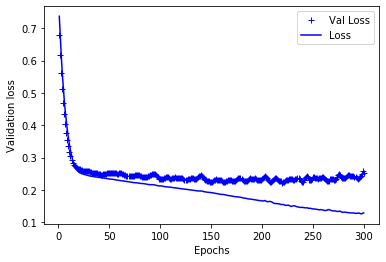

In [69]:
import matplotlib.pyplot as plt

model_acc = model_hist.history['acc']
model_loss = model_hist.history['loss']
model_val_acc = model_hist.history['val_acc']
model_val_loss = model_hist.history['val_loss']

epochs = range(1, len(model_acc) + 1)
# b+ is for "blue cross"
plt.plot(epochs, model_val_loss, 'b+', label='Val Loss')
plt.plot(epochs, model_loss, 'b', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

At a first glance, I can tell that the data is being over fit at ~25 epochs. Thus, I will retrain the data up to 50 epochs to combat overfitting to the training data.

In [73]:
keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(5,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_hist = model.fit(trainData, trainTarget, epochs=25, batch_size=128, validation_data=(valData, valTarget))

Train on 284 samples, validate on 142 samples
Epoch 1/25
284/284 [==============================] - 0s 1ms/step - loss: 0.7124 - acc: 0.5317 - val_loss: 0.6733 - val_acc: 0.5634
Epoch 2/25
284/284 [==============================] - 0s 41us/step - loss: 0.6562 - acc: 0.6620 - val_loss: 0.6180 - val_acc: 0.7113
Epoch 3/25
284/284 [==============================] - 0s 38us/step - loss: 0.6030 - acc: 0.8099 - val_loss: 0.5682 - val_acc: 0.8451
Epoch 4/25
284/284 [==============================] - 0s 28us/step - loss: 0.5548 - acc: 0.8521 - val_loss: 0.5238 - val_acc: 0.8592
Epoch 5/25
284/284 [==============================] - 0s 51us/step - loss: 0.5103 - acc: 0.8803 - val_loss: 0.4852 - val_acc: 0.8592
Epoch 6/25
284/284 [==============================] - 0s 35us/step - loss: 0.4723 - acc: 0.8803 - val_loss: 0.4512 - val_acc: 0.8803
Epoch 7/25
284/284 [==============================] - 0s 33us/step - loss: 0.4381 - acc: 0.8732 - val_loss: 0.4210 - val_acc: 0.8803
Epoch 8/25
284/284 [====

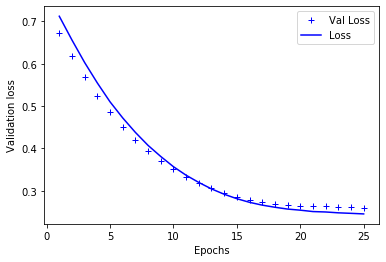

In [74]:
model_acc = model_hist.history['acc']
model_loss = model_hist.history['loss']
model_val_acc = model_hist.history['val_acc']
model_val_loss = model_hist.history['val_loss']

epochs = range(1, len(model_acc) + 1)
# b+ is for "blue cross"
plt.plot(epochs, model_val_loss, 'b+', label='Val Loss')
plt.plot(epochs, model_loss, 'b', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

Above graph looks so much better and doesn't seem to overfit the train data yet.

In [78]:
test_loss, test_acc = model.evaluate(testData, testTarget)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)

numBC = 0
for i in range(len(testTarget)):
    if testTarget[i] == 1:
        numBC += 1
BCPer = numBC/len(testTarget)
print("Number of patients who have breast cancer in test data percentage: ", BCPer*100)

143/143 [==============================] - 0s 99us/step
Test Loss:  0.22390625287186017
Test Accuracy:  0.9230769230769231
Number of patients who have breast cancer in test data percentage:  63.63636363636363


Considering the fact that over 60% of the patients has breast cancer and our model diagnosed 92% of the patients correctly, we are very happy with the results.